In [233]:
# Help with processing
import numpy as np
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# STATS
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.datasets import fetch_california_housing
import statsmodels.api as sm

In [203]:
cali = fetch_california_housing(as_frame=True)
cali.data.pop('Latitude')
cali.data.pop('Longitude')
cali_data = pd.concat([cali.data, cali.target.to_frame()], axis=1)

In [204]:
cali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   MedHouseVal  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


<AxesSubplot:>

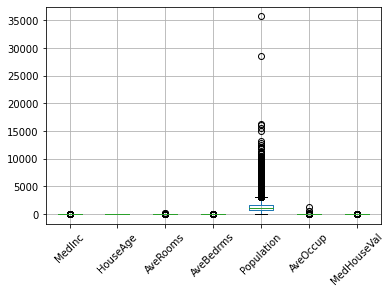

In [206]:
cali_data.boxplot(rot=45)

<AxesSubplot:>

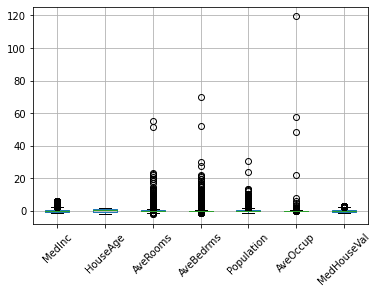

In [207]:
cali_data.iloc[:, :] = pd.DataFrame(scale(cali_data))
cali_data.boxplot(rot=45)

In [208]:
cali_data.corr().style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


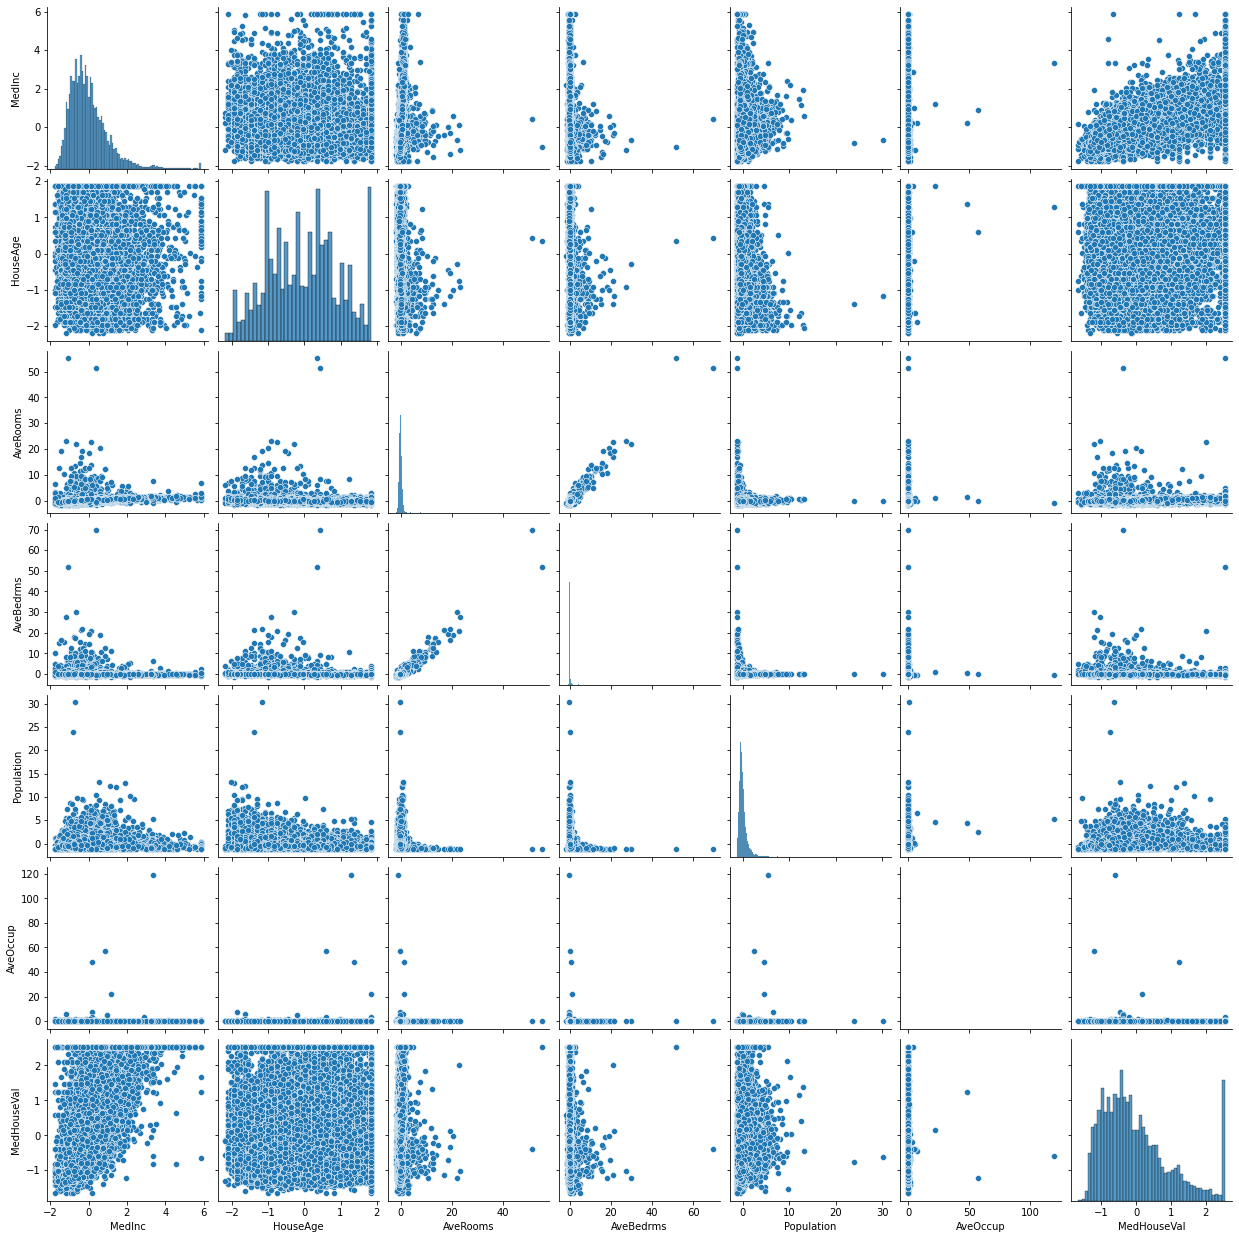

In [229]:
sns.pairplot(cali_data)

In [209]:
results = sm.OLS(cali_data.MedHouseVal, cali_data.loc[:, cali_data.columns != 'MedHouseVal']).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.540
Model:                            OLS   Adj. R-squared (uncentered):              0.540
Method:                 Least Squares   F-statistic:                              4032.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):                        0.00
Time:                        23:08:05   Log-Likelihood:                         -21280.
No. Observations:               20640   AIC:                                  4.257e+04
Df Residuals:                   20634   BIC:                                  4.262e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.8839      0.007    130.186      0.000       0.871       0.897
HouseAge       0.1800      0.005     35.572      0.000       0.170       0.190
AveRooms      -0.4540      0.013    -35.238      0.000      -0.479      -0.429
AveBedrms      0.4081      0.012     33.670      0.000       0.384       0.432
Population     0.0217      0.005      4.337      0.000       0.012       0.032
AveOccup      -0.0439      0.005     -9.262      0.000      -0.053      -0.035
==============================================================================
Omnibus:                     4480.630   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16778.766
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                       6.883   Cond. No.                         5.31
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Cumulative Proportion of Variance')

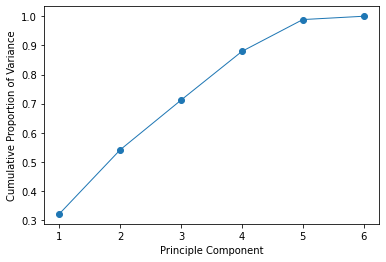

In [220]:
cali_pca = PCA()
pca = cali_pca.fit_transform(cali_data.loc[:, cali_data.columns != 'MedHouseVal'])
plt.plot(np.arange(1,7), np.cumsum(cali_pca.explained_variance_ratio_), 'o-', linewidth='1');
plt.xlabel('Principle Component');
plt.ylabel('Cumulative Proportion of Variance')

In [227]:
results = sm.OLS(cali_data.MedHouseVal, pca[:, 0:3]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.439
Model:                            OLS   Adj. R-squared (uncentered):              0.439
Method:                 Least Squares   F-statistic:                              5393.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):                        0.00
Time:                        23:13:25   Log-Likelihood:                         -23313.
No. Observations:               20640   AIC:                                  4.663e+04
Df Residuals:                   20637   BIC:                                  4.666e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1116      0.004     29.729      0.000       0.104       0.119
x2             0.0580      0.005     12.797      0.000       0.049       0.067
x3            -0.6336      0.005   -123.015      0.000      -0.644      -0.623
==============================================================================
Omnibus:                     3869.189   Durbin-Watson:                   0.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7859.633
Skew:                           1.124   Prob(JB):                         0.00
Kurtosis:                       5.022   Cond. No.                         1.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
svm_reg = LinearSVR()
svm_reg.fit(pca[:, 0:3], cali_data.MedHouseVal)
y_pred = svm_reg.predict(pca[:, 0:3])
r2_score(cali_data.MedHouseVal, y_pred)

0.40514256374043345

In [241]:
svm_reg = LinearSVR()
svm_reg.fit(cali_data.loc[:, cali_data.columns != 'MedHouseVal'], cali_data.MedHouseVal)
y_pred = svm_reg.predict(cali_data.loc[:, cali_data.columns != 'MedHouseVal'])
r2_score(cali_data.MedHouseVal, y_pred)

/home/rona1das/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.22134399665019733